# **U4 :: Proyecto 1**
##Caso de Estudio: Producción de miel en EEUU

En esta práctica vamos a trabajar con un dataset sobre la producción de miel en los Estados Unidos extraído de Kaggle. Este conjunto de datos contiene información sobre la producción de miel a nivel estatal en los Estados Unidos desde 1985 hasta 2012. Analizaremos la producción total de miel a lo largo de los años para identificar posibles tendencias y utilizaremos un modelo de regresión lineal para predecir la producción futura.

El dataset tiene las siguientes columnas: `state`, `numcol`, `yieldpercol`, `totalprod`, `stocks`, `priceperlb` `prodvalue`, `year`. Una vez cargado el dataset, realiza las acciones sabidas de inspección inicial para familiarizarte con los datos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("U4__honeyproduction.csv")

Para empezar nos interesa averiguar cuál la producción total de miel por año. Usa el método .`groupby()` proporcionado por pandas para obtener la media de `totalprod` por año. Almacena esto en una variable llamada `prod_per_year`.

In [16]:
prod_per_year = df.groupby("year")["totalprod"].mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


Crea una variable llamada X que es la columna de años en este DataFrame `prod_per_year`. Después de crear `X`, necesitaremos remodelarla para obtener el formato correcto, usando este comando: `X = X.values.reshape(-1, 1)`

In [ ]:
X = prod_per_year["year"]
X = X.values.reshape(-1, 1)

print(X)

[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


Crea una variable llamada `y` que es la columna `totalprod` en el conjunto de datos `prod_per_year`.

In [18]:
y_produccion = prod_per_year["totalprod"]
print(y_produccion)

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64


Usando `plt.scatter()`, traza `y vs X `como un diagrama de dispersión. Muestra el gráfico usando `plt.show()`. ¿Puedes ver una relación vagamente lineal entre estas variables?

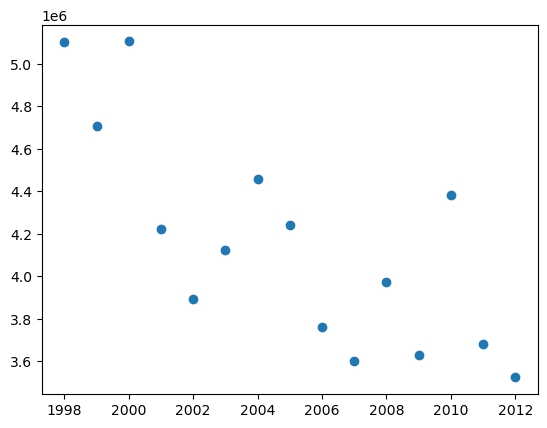

In [ ]:
plt.scatter(X, y_produccion)
plt.show()

# Si, pero la relación es regresión lineal negativa, cada vez que aumenta el año, la producción baja

## Crear y ajustar un modelo de Regresión Lineal

Crea un modelo de regresión lineal de scikit-learn y llámalo `regr`. Usa el constructor `LinearRegression()` del módulo `linear_model` para hacer esto.

In [ ]:
# Importar la librería
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
regr = LinearRegression()

# Fórmula que ajusta el modelo:
# y = m * X + b
#   y  -> valor que queremos predecir (dependiente)
#   X  -> valor de la variable independiente (entrada)
#   m  -> coeficiente / pendiente (cuánto cambia y por cada unidad de X)
#   b  -> intercepción / intercepto (valor de y cuando X = 0)
    # fit_intercept: decide si calculamos b (intercepto)
    # True -> calcula la intercepción 'b' automáticamente
    # False -> fuerza la línea a pasar por el origen (b=0)

    # copy_X: decide si se hace una copia de los datos X
    # True -> copia los datos para no modificarlos directamente
    # False -> usa los datos originales (puede ahorrar memoria pero los modifica)

    # n_jobs: número de procesos paralelos usados en el cálculo
    # None o 1 -> un solo proceso
    # -1 -> usar todos los núcleos disponibles
    # >1 -> usar esa cantidad de procesos en paralelo

    # positive: decide si los coeficientes deben ser positivos
    # True -> fuerza que todos los coeficientes sean >= 0
    # False -> coeficientes pueden ser positivos o negativos

    # tol: tolerancia para los cálculos internos de optimización
    # Es un valor positivo pequeño que indica la precisión mínima requerida
    # Ejemplo: tol=1e-4 -> se considera que el cálculo es lo suficientemente bueno si el cambio es menor que 0.0001


Ajusta el modelo a los datos usando `.fit()`. Puedes pasar X a tu modelo regr como parámetro de `.fit()`.

In [ ]:


# ----------------------------
# Ajustar el modelo a los datos
# ----------------------------
# X -> variables independientes (entrada conocida)
# y_produccion -> variable dependiente (lo que queremos predecir)
regr.fit(X, y_produccion)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Después de ajustar el modelo, imprime la pendiente de la línea (almacenada en una lista llamada `regr.coef_`) y la intercepción de la línea (`regr.intercept_`).

In [27]:
# ----------------------------
# Valores que devuelve el modelo después del fit
# ----------------------------
print("Coeficiente (pendiente m):", regr.coef_)   # array con la pendiente(s) de cada variable X
print("Intercepción (b):", regr.intercept_)      # valor de y cuando X=0

Coeficiente (pendiente m): [-88303.18915238]
Intercepción (b): 181208083.10732976


Crea una lista llamada `y_predict` que son las predicciones que tu modelo `regr` haría sobre los datos X.

In [28]:
y_predict = regr.predict(X)
print(y_predict)

[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


Traza `y_predict` vs `X` como una línea, encima de tu diagrama de dispersión usando plt.plot(). Asegúrate de llamar a `plt.show()` después de trazar la línea.

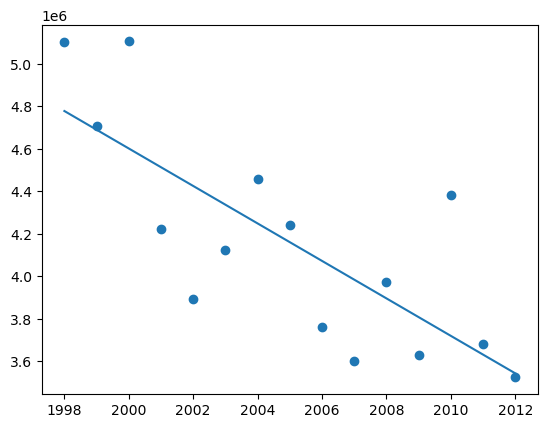

In [31]:
plt.scatter(X, y_produccion)
plt.plot(X, y_predict)
plt.show()

## Predecir el declive de la miel

Parece que la producción de miel ha entrado en declive según este modelo lineal. Podemos predecir ahora cómo podría pasar para el año 2050 en términos de producción de miel. Como los datos se detienen en 2013, podemos crear una matriz NumPy llamada `X_future` que simule el rango de 2013 a 2050. El siguiente código crea una matriz NumPy con los números del 2013 a 2050.

Añade la siguiente líneas:
`nums = np.array(range(2013, 2051))`
`X_future = nums.reshape(-1, 1)`

> `nums.reshape(-1, 1)` transforma el array en un array 2D con una columna y tantas filas como sea necesario (-1). Este formato es un requisito para los métodos `fit()` y `predict()` de scikit-learn, que esperan que las características de entrada (en este caso, los años) estén en este formato




In [33]:
nums = np.array(range(2013, 2051))
X_future = nums.reshape(-1, 1)

Crea una lista llamada `future_predict` que son los valores `y` que tu modelo regr predeciría para los valores de `X_future`.

In [34]:
future_predict = regr.predict(X_future)
print(future_predict)

[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876
 2394125.07375637 2305821.88460398 2217518.69545159 2129215.50629923
 2040912.31714684 1952609.12799445 1864305.93884209 1776002.7496897
 1687699.56053731 1599396.37138492 1511093.18223256 1422789.99308017
 1334486.80392778 1246183.61477539 1157880.42562303 1069577.23647064
  981274.04731825  892970.85816586  804667.6690135   716364.47986111
  628061.29070872  539758.10155633  451454.91240397  363151.72325158
  274848.53409919  186545.34494683]


Traza `future_predict` vs `X_future` en un gráfico diferente. ¿Cuánta miel se producirá en el año 2050, según esto?

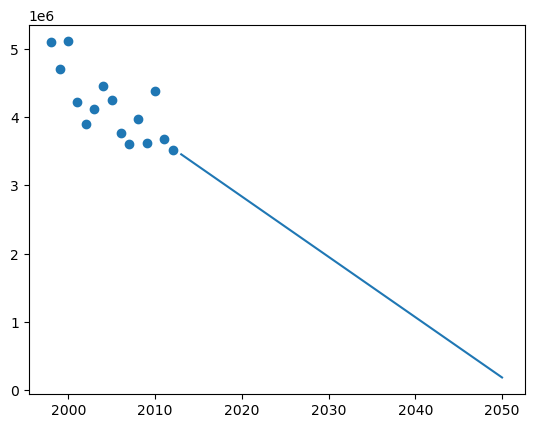

In [35]:
plt.scatter(X, y_produccion)
plt.plot(X_future, future_predict)
plt.show()

## Conclusiones

(Escribe en la siguiente celda qué concluciones crees que se pueden sacar del gráfico previo)

## Conclusiones

Según el modelo de regresión lineal ajustado a los datos históricos, la producción total de miel en los Estados Unidos muestra una tendencia a la baja. La gráfica de predicción hasta el año 2050 sugiere que esta disminución podría continuar, proyectando una producción de miel significativamente menor en las próximas décadas. Es importante recordar que este es un modelo lineal simple y factores externos no considerados podrían influir en la producción real.